In [1]:
from scipy import fft, arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

In [2]:
def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)

In [3]:
def generate_song_frequency(song_path):
    # Sine sample with a frequency of 1hz and add some noise
#     sr = 32  # sampling rate
#     y = np.linspace(0, 2*np.pi, sr)
#     y = np.tile(np.sin(y), 5)
#     y += np.random.normal(0, 1, y.shape)
#     t = np.arange(len(y)) / float(sr)

#     plt.subplot(2, 1, 1)
#     plt.plot(t, y)
#     plt.xlabel('t')
#     plt.ylabel('y')

#     frq, X = frequency_sepectrum(y, sr)

#     plt.subplot(2, 1, 2)
#     plt.plot(frq, X, 'b')
#     plt.xlabel('Freq (Hz)')
#     plt.ylabel('|X(freq)|')
#     plt.tight_layout()


    # wav sample from https://freewavesamples.com/files/Alesis-Sanctuary-QCard-Crickets.wav
#     here_path = os.path.dirname("C:/Users/qasim/Desktop/Exigence/Shazam")
    wav_file_name = song_path
    # wave_file_path = os.path.join(here_path, wav_file_name)
    sr, signal = wavfile.read(wav_file_name)

    y = signal[:, 0]  # use the first channel (or take their average, alternatively)
    t = np.arange(len(y)) / float(sr)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')

    frq, X = frequency_sepectrum(y, sr)

    plt.subplot(2, 1, 2)
    plt.plot(frq, X, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')
    plt.tight_layout()

    plt.show()
    return y, t, frq, X

8141824


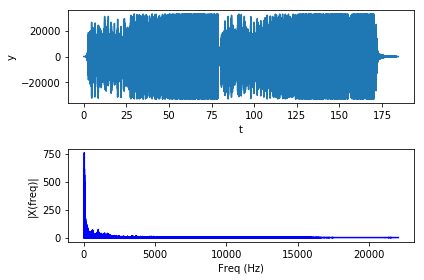

In [4]:
y_imm, t_imm, frq_imm, X_imm = generate_song_frequency(
    "Dynoro & Gigi DAgostino - In My Mind.wav")

7790592


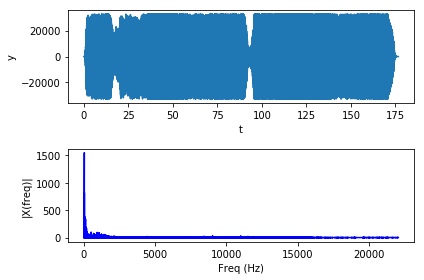

In [5]:
y_animals, t_animals, frq_animals, X_animals = generate_song_frequency(
    "Martin Garrix - Animals (test#1).wav")

5435689


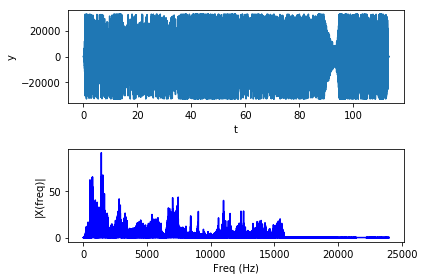

In [6]:
y_test_animals, t_test_animals, frq_test_animals, X_test_animals = generate_song_frequency(
    "Animals,  Shazam Project Test.wav")

8664064


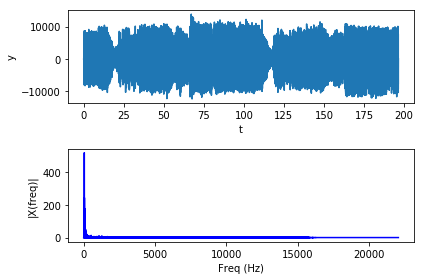

In [7]:
y_test2_animals, t_test2_animals, frq_test2_animals, X_test2_animals = generate_song_frequency(
    "Animals Live Test.wav")

### 50,000 samples per second.

In [10]:
def differentiator(comp_A, comp_B):
    """Return the error between comp_A and comp_B"""
    error = 0
    for t1,t2 in zip(comp_A, comp_B):
        error += (t1-t2)**2
    return error

In [11]:
def sort_list(lists):
    listofTuples = sorted(lists.items() , reverse=False, key=lambda x: x[1])
    # Iterate over the sorted sequence
    data = []
    for elem in listofTuples :
        data.append((elem[0], elem[1]))  
    return data

In [12]:
def knn_sorted(source, test, tracks):
    all_error = {}
    for t, track in zip(test, tracks):
        one_error = differentiator(source, t)
        all_error[track] = one_error
    
    return sort_list(all_error)

In [13]:
tracks = ["In my Mind", "Animals (Recorder from Samsung).", "Animals Live Show"]
X_all_test = [X_imm, X_test_animals, X_test2_animals]
sorted_tracks = knn_sorted(X_animals, X_all_test, tracks)

In [14]:
sorted_tracks

[('Animals Live Show', 68887687.35168631),
 ('Animals (Recorder from Samsung).', 75719799.18003477),
 ('In my Mind', 84629134.80688299)]

In [15]:
# As we've seen, it works perfectly for Martin Garrix's Animals Identification.
# Now, let's compare it to Ed Sheeran's "Thinking it out" to Marvin Gaye's "Let's Get it On"
# Versions : Acoustic and Live.

12419072


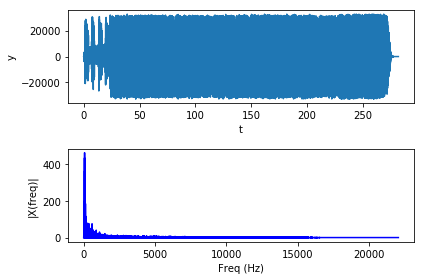

13042688


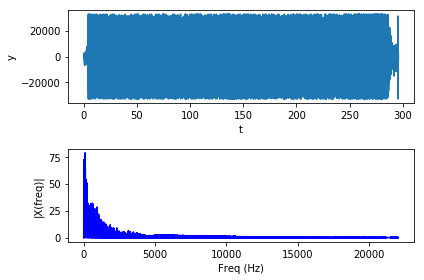

11732992


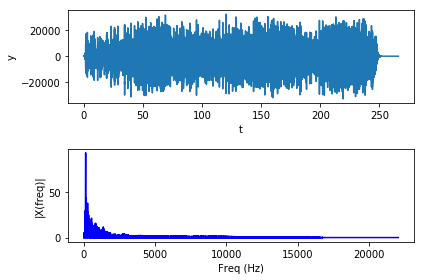

12959744


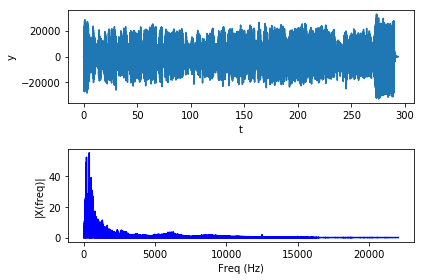

In [16]:
_,_,_,X_org = generate_song_frequency("Thinking out Loud.wav")
_,_,_,X_diff = generate_song_frequency("Marvin Gaye - Lets get it on.wav")
_,_,_,X_acoustic = generate_song_frequency("Ed Sheeran - Thinking Out Loud (x Acoustic Session).wav")
_,_,_,X_live = generate_song_frequency("Ed Sheeran - Thinking Out Loud - (Live At Capitals Jingle Bell Ball 2017).wav")

In [17]:
tracks = ["Marvin Gaye - Let's Get it On", "Ed Sheeran - Acoustic"
          , "Ed Sheeran - Live", "In my Mind", "Animals (Recorder from Samsung).", 
          "Animals Live Show", "Animals - Martin Garrix Orginal"]
X_all_test = [X_diff, X_acoustic, X_live, X_imm, X_test_animals, X_test2_animals, X_animals]
sorted_tracks = knn_sorted(X_org, X_all_test, tracks)

In [18]:
sorted_tracks

[('Ed Sheeran - Acoustic', 19975609.10241785),
 ('Ed Sheeran - Live', 22096243.28001153),
 ("Marvin Gaye - Let's Get it On", 22118228.532095484),
 ('Animals Live Show', 27215090.990567494),
 ('Animals (Recorder from Samsung).', 29343450.43499351),
 ('In my Mind', 53078602.350228995),
 ('Animals - Martin Garrix Orginal', 69062259.20525114)]

In [19]:
#This Further proves the similarity between the frequency domain Frequencies and Associated Tracks.

### Implemented using : Discrete Fourier Series, Blackman Windows, and KNN Algorithms.

In [20]:
#Return to this, soon?
#Let me know --> qasim31wani@gmail.com for any ideas on what to do with this Algorithm. Shazam?

# Testing with smaller batch files